In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('cleaned_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   float64
 1   PID              2930 non-null   float64
 2   MS SubClass      2930 non-null   float64
 3   MS Zoning        2930 non-null   int64  
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   float64
 6   Street           2930 non-null   int64  
 7   Alley            2930 non-null   int64  
 8   Lot Shape        2930 non-null   int64  
 9   Land Contour     2930 non-null   int64  
 10  Utilities        2930 non-null   int64  
 11  Lot Config       2930 non-null   int64  
 12  Land Slope       2930 non-null   int64  
 13  Neighborhood     2930 non-null   int64  
 14  Condition 1      2930 non-null   int64  
 15  Condition 2      2930 non-null   int64  
 16  Bldg Type        2930 non-null   int64  
 17  House Style   

In [4]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# 1. Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred_1 = model1.predict(X_test)

In [8]:
mse1 = mean_squared_error(y_test, y_pred_1)

In [9]:
r2_1 = r2_score(y_test, y_pred_1)

In [10]:
mse1, r2_1

(1181493833.4899778, 0.8526365113533899)

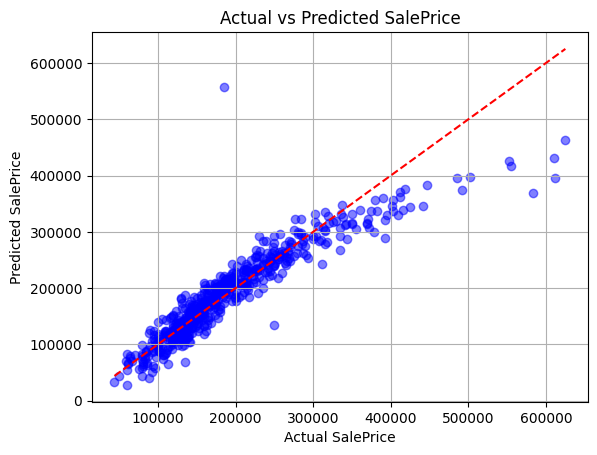

In [11]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_1, alpha=0.5, color='blue')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.grid(True)
plt.show()

# 2. Decision Tree Regressor

In [12]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [13]:
y_pred_2 = model2.predict(X_test)

In [14]:
mse2 = mean_squared_error(y_test, y_pred_2)

In [15]:
r2_2 = r2_score(y_test,y_pred_2)

In [16]:
mse2, r2_2

(1321089173.0443685, 0.8352252852831037)

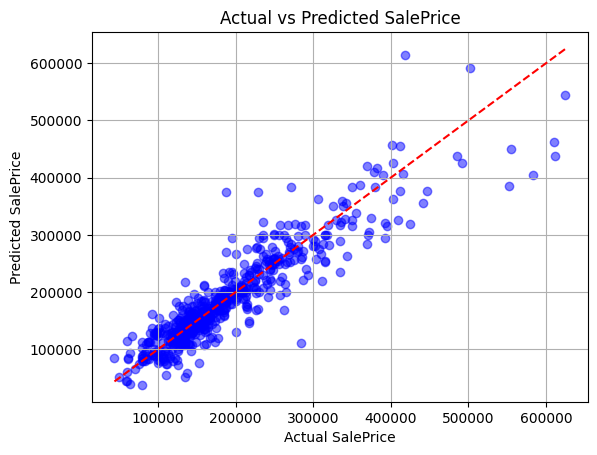

In [18]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_2, alpha=0.5, color='blue')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.grid(True)
plt.show()

# 3. Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=100,random_state=42)

In [20]:
model3.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
y_pred_3 = model3.predict(X_test)

In [22]:
mse3 = mean_squared_error(y_test, y_pred_3)

In [23]:
r2_3 = r2_score(y_test, y_pred_3)

In [24]:
mse3, r2_3

(695616715.7916274, 0.913238221737345)

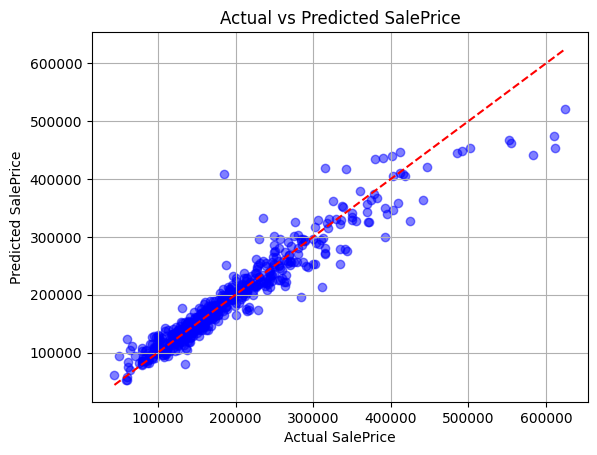

In [26]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_3, alpha=0.5, color='blue')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.grid(True)
plt.show()

# 4. Neural Network

In [27]:
from sklearn.neural_network import MLPRegressor
model4 = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=0)
model4.fit(X_train, y_train)

C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=0)

In [28]:
y_pred_4 = model4.predict(X_test)

In [29]:
mse4 = mean_squared_error(y_test, y_pred_4)

In [30]:
r2_4 = r2_score(y_test, y_pred_4)

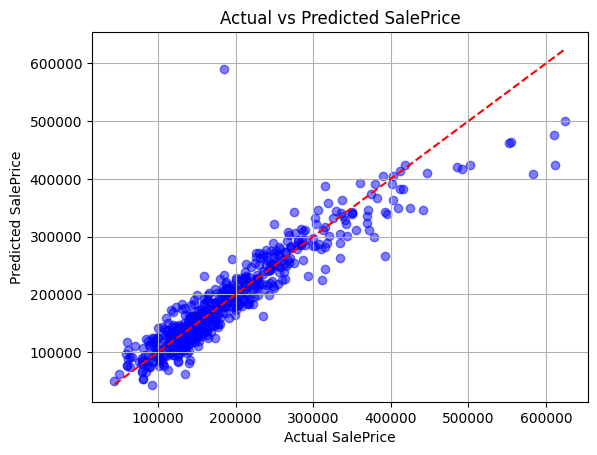

In [31]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_4, alpha=0.5, color='blue')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.grid(True)
plt.show()

# 5 Neural Network (designed from scratch)

In [84]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [85]:
model5 = Sequential()
model5.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model5.add(Dropout(0.2))
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(1))

C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model5.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [87]:
model5.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 37352161280.0000 - mae: 177017.2031 - val_loss: 37998051328.0000 - val_mae: 179951.3750
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 37236801536.0000 - mae: 176706.7344 - val_loss: 37568622592.0000 - val_mae: 178807.7344
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36316073984.0000 - mae: 175180.0781 - val_loss: 36103389184.0000 - val_mae: 174851.5156
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35475189760.0000 - mae: 171586.9219 - val_loss: 32986429440.0000 - val_mae: 166116.5156
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32165857280.0000 - mae: 161959.9062 - val_loss: 28061177856.0000 - val_mae: 151243.2656
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25836107776.0000 - mae: 143071.3594 - val_loss: 21859840000.0000 - val_mae: 130048.8281
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20131362816.0000 - mae: 122017.6875 - val_loss: 15489603584

In [88]:
mse5, mae = model5.evaluate(X_test, y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1665063936.0000 - mae: 27106.3320 


In [89]:
y_pred_5 = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [90]:
r2_5 = r2_score(y_test, y_pred_5)

In [91]:
r2_5

0.8728942499028766